<a href="https://colab.research.google.com/github/CodeHunterOfficial/ABC_DataMining/blob/main/DL/2.%20%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%BE%D0%B1%D1%80%D0%B0%D1%82%D0%BD%D0%BE%D0%B3%D0%BE_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%BE%D1%81%D1%82%D1%80%D0%B0%D0%BD%D0%B5%D0%BD%D0%B8%D1%8F_%D0%BE%D1%88%D0%B8%D0%B1%D0%BA%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Алгоритм обратного распространения ошибки

## 1. Граф вычислений

Для нахождения частных производных сложной функции, заданной в виде графа вычислений, используется метод обратного распространения ошибки. Рассмотрим, как можно вычислить производную некоторой вершины $a$ по другой вершине $b$ в графе вычислений. Для этого необходимо:

1. Найти все возможные пути из вершины $a$ в вершину $b$, которые ещё не были посещены.
2. Для каждого пути перемножить производные, соответствующие рёбрам этого пути.
3. Сложить все полученные произведения.

В качестве примера рассмотрим функцию $f(x, y) = x^2 + xy + (x + y)^2$. Построим граф вычислений для этой функции и найдём частные производные $\frac{\partial f}{\partial x}$ и $\frac{\partial f}{\partial y}$.

## Построение графа вычислений

Граф вычислений для функции $f(x, y)$ представлен на Рис. 1. Каждая вершина графа соответствует результату выполнения одной элементарной операции (сложения или умножения). Рёбра графа отражают зависимости между переменными и результатами операций.


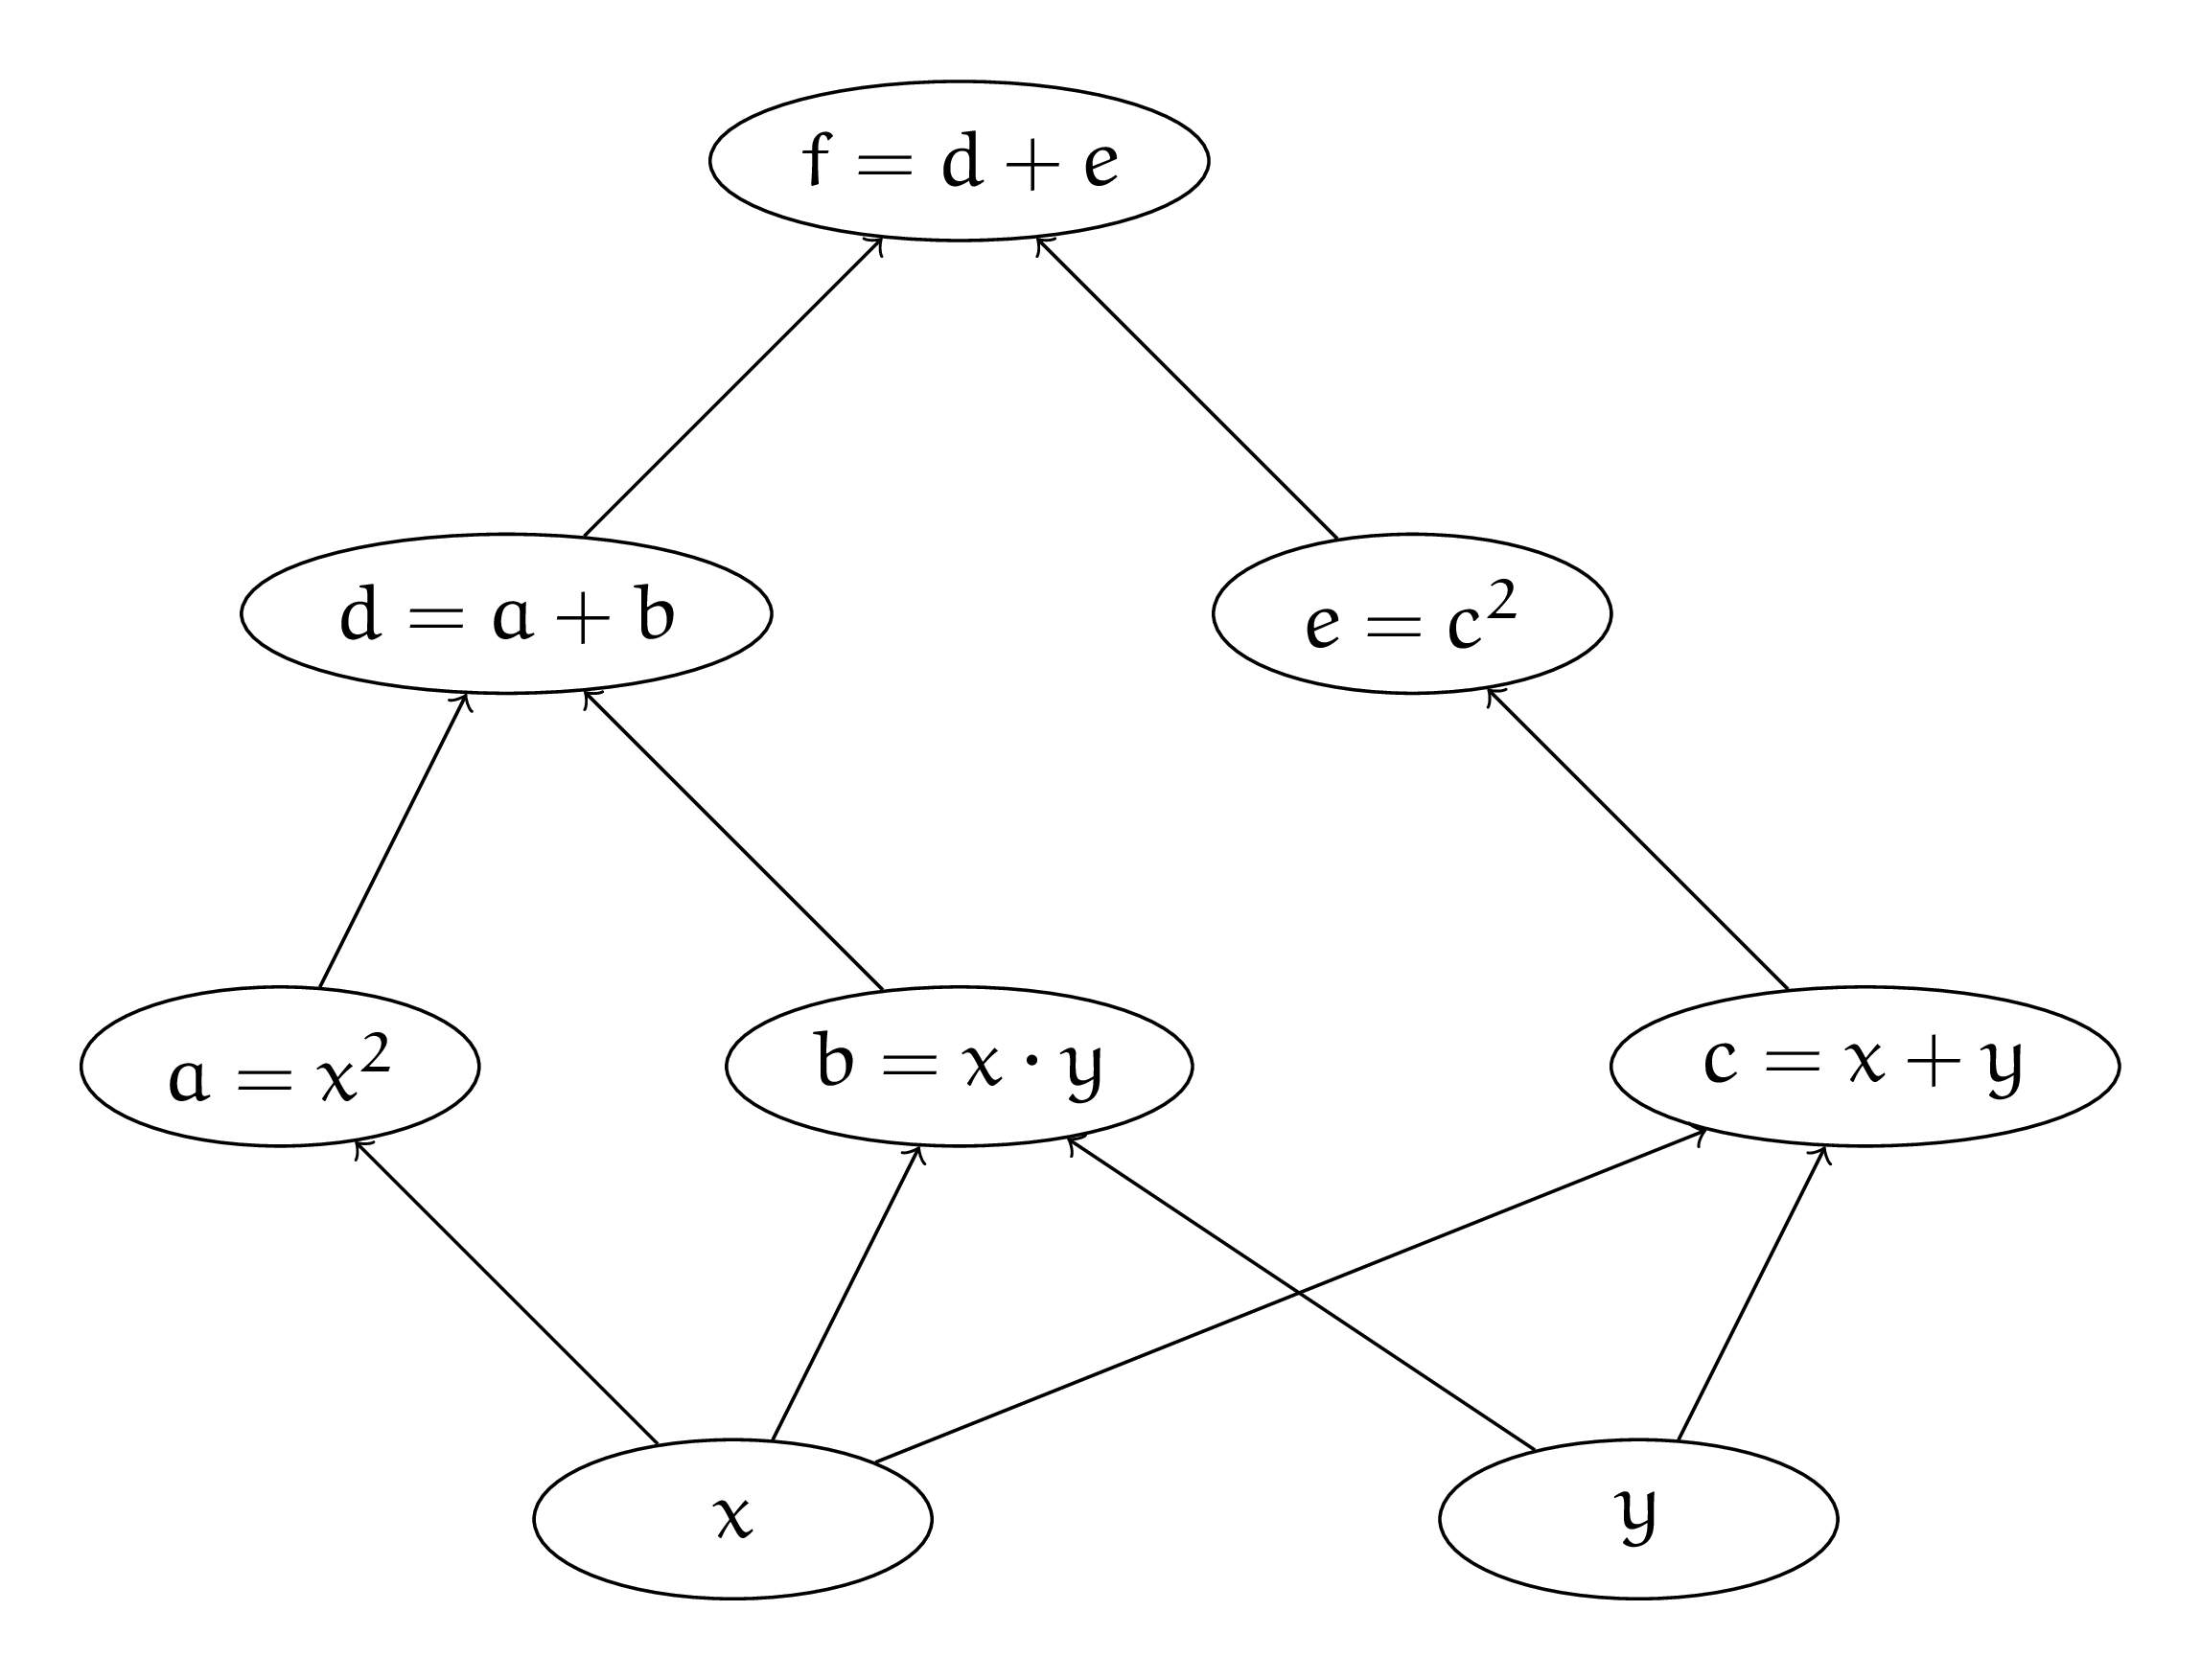


Каждому ребру графа приписывается производная выхода по входу. Например, для ребра между $x$ и $a$ производная будет равна $\frac{\partial a}{\partial x} = 2x$ (см. Рис. 2).


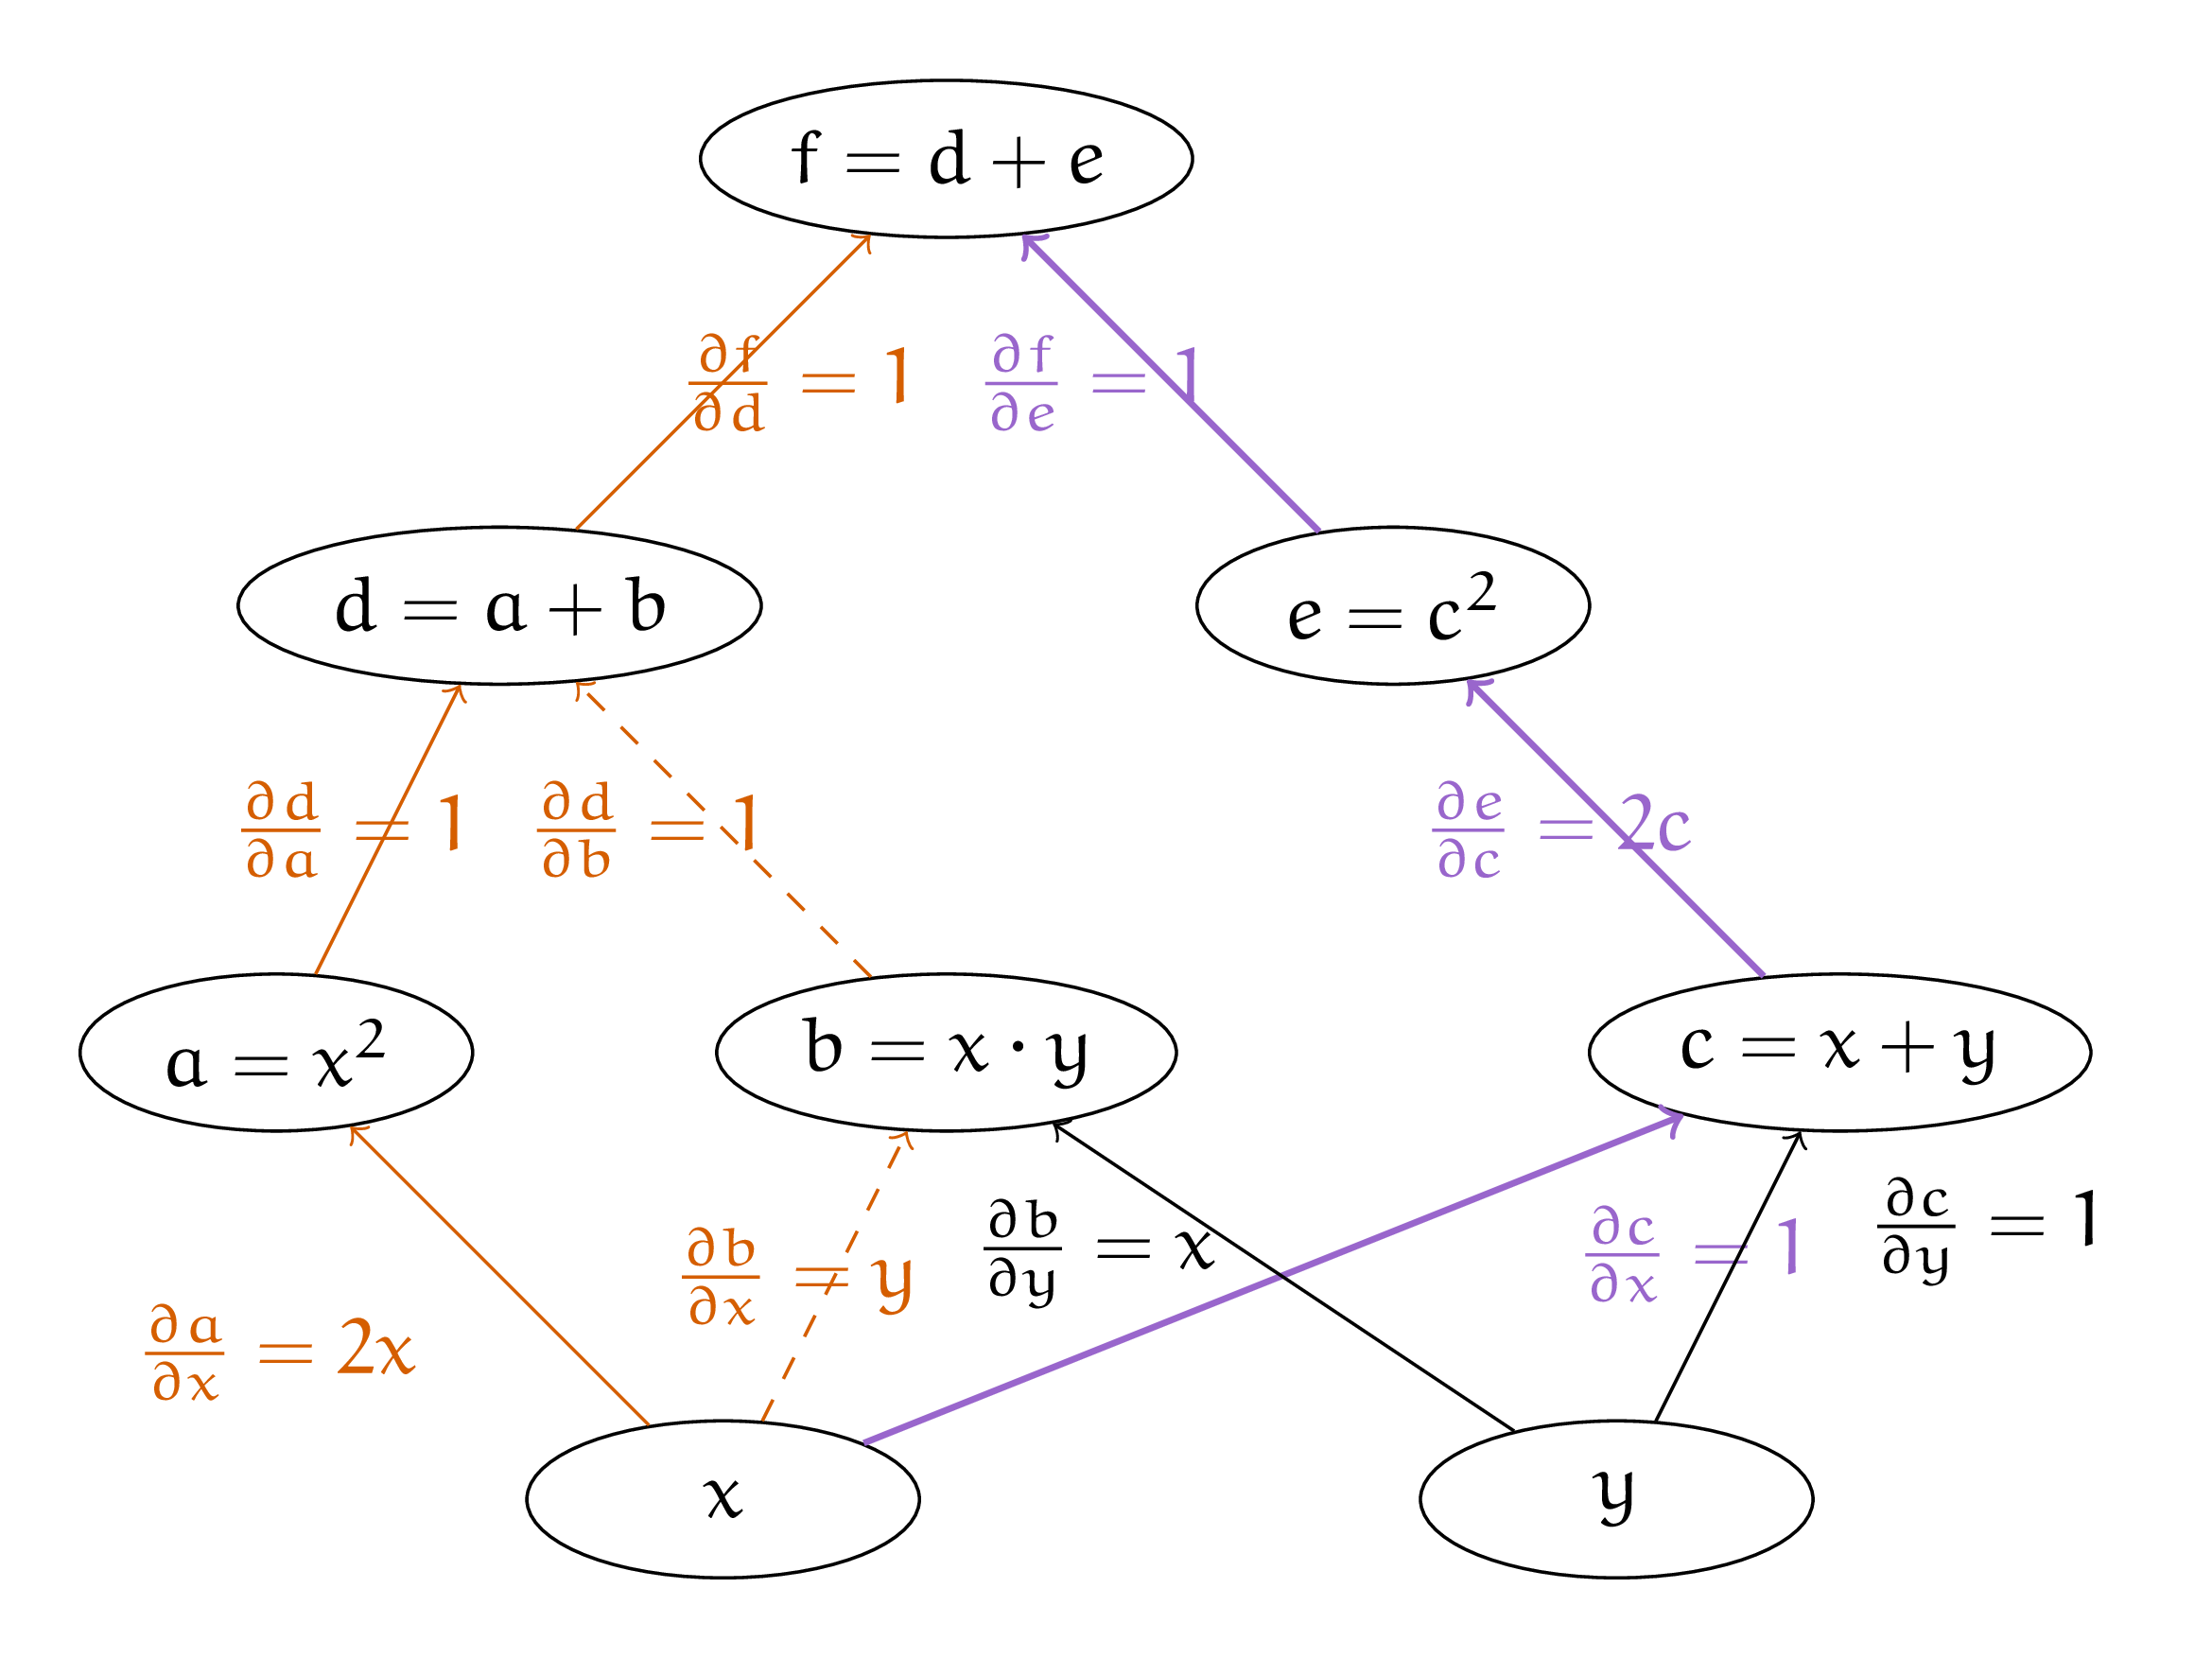


## Вычисление частных производных

Для нахождения частной производной $\frac{\partial f}{\partial x}$ необходимо пройти по всем возможным траекториям из $x$ в $f$ и перемножить производные, соответствующие рёбрам каждой траектории. Затем полученные произведения суммируются.

Рассмотрим траектории из $x$ в $f$:

1. Траектория через вершину $a$:
$$
   \frac{\partial f}{\partial d} \cdot \frac{\partial d}{\partial a} \cdot \frac{\partial a}{\partial x} = 1 \cdot 1 \cdot 2x = 2x.
$$

2. Траектория через вершину $b$:
$$
   \frac{\partial f}{\partial d} \cdot \frac{\partial d}{\partial b} \cdot \frac{\partial b}{\partial x} = 1 \cdot 1 \cdot y = y.
$$

3. Траектория через вершину $c$:
$$
   \frac{\partial f}{\partial e} \cdot \frac{\partial e}{\partial c} \cdot \frac{\partial c}{\partial x} = 1 \cdot 2c \cdot 1 = 2(x + y).
$$

Суммируя полученные значения, получаем:
$$
\frac{\partial f}{\partial x} = 2x + y + 2(x + y).
$$

Аналогично вычисляется частная производная $\frac{\partial f}{\partial y}$:

1. Траектория через вершину $b$:
$$
   \frac{\partial f}{\partial d} \cdot \frac{\partial d}{\partial b} \cdot \frac{\partial b}{\partial y} = 1 \cdot 1 \cdot x = x.
$$

2. Траектория через вершину $c$:
$$
   \frac{\partial f}{\partial e} \cdot \frac{\partial e}{\partial c} \cdot \frac{\partial c}{\partial y} = 1 \cdot 2c \cdot 1 = 2(x + y).
$$

Суммируя полученные значения, получаем:
$$
\frac{\partial f}{\partial y} = x + 2(x + y).
$$



## 2. Алгоритм обратного распространения ошибки

Рассмотрим нейронную сеть, представленную на Рис. 3, где $w_k$ — веса для $k$-го слоя, а $f(t)$ — некоторая функция активации. Целью является обучение такой нейронной сети с использованием градиентного спуска.


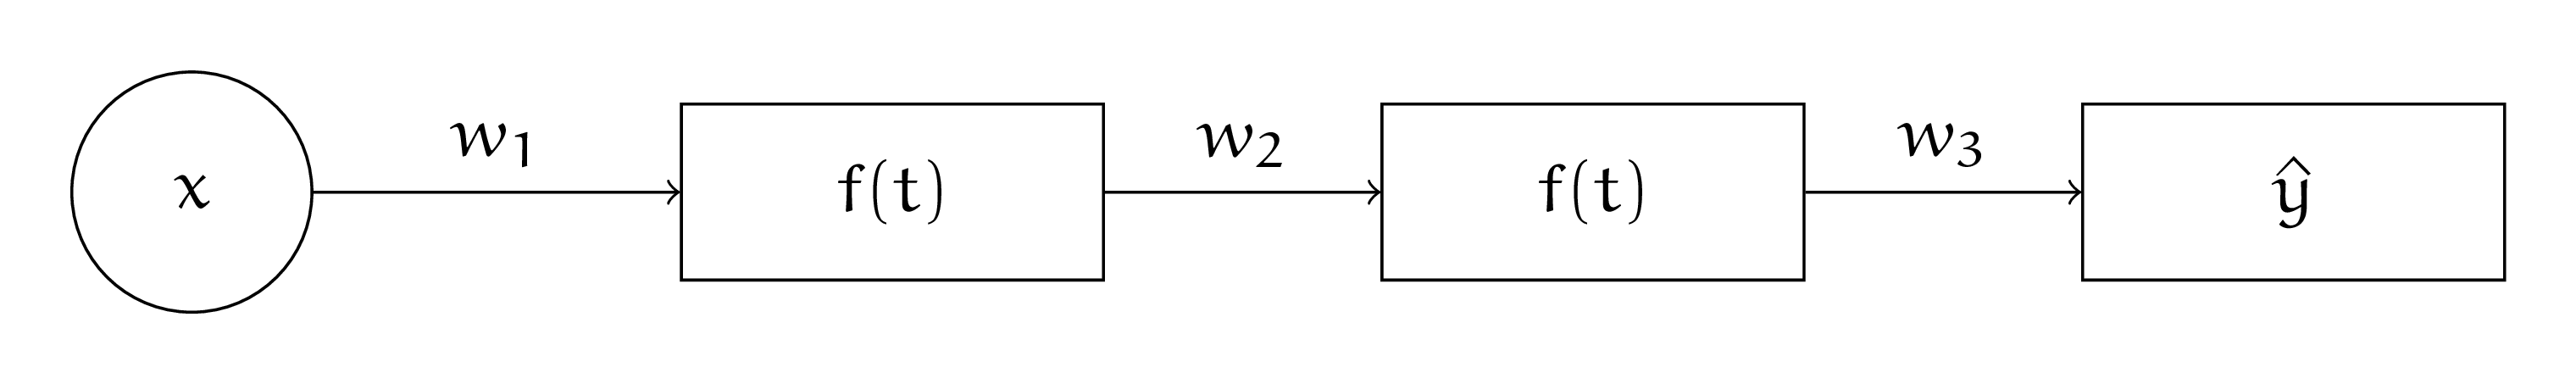


### а) Представление нейронной сети как сложной функции

Нейронная сеть может быть представлена как сложная функция, которая последовательно применяет слои к входным данным. Для одного наблюдения $x_i$ выход сети $\hat{y}$ можно записать следующим образом:

$$
\hat{y} = f\left(f\left(x_i \cdot w_1\right) \cdot w_2\right) \cdot w_3.
$$

Здесь каждый слой представляет собой линейное преобразование (умножение на веса) с последующим применением функции активации $f(t)$.

### б) Вычисление производных функции потерь

Предположим, что решается задача регрессии, и функция потерь $L(w_1, w_2, w_3)$ задаётся как среднеквадратичная ошибка:

$$
L(w_1, w_2, w_3) = \frac{1}{2} \cdot (y - \hat{y})^2 = \frac{1}{2} \cdot \left(y - f\left(f\left(x \cdot w_1\right) \cdot w_2\right) \cdot w_3\right)^2.
$$

Для нахождения градиента функции потерь по весам $w_k$ используем правило дифференцирования сложной функции (цепное правило):

1. Производная по $w_3$:
$$
   \frac{\partial L}{\partial w_3} = \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial w_3} = (y - \hat{y}) \cdot f\left(f\left(x \cdot w_1\right) \cdot w_2\right).
$$

2. Производная по $w_2$:
$$
   \frac{\partial L}{\partial w_2} = \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial w_2} = (y - \hat{y}) \cdot w_3 \cdot f'\left(f\left(x \cdot w_1\right) \cdot w_2\right) \cdot f\left(x \cdot w_1\right).
$$

3. Производная по $w_1$:
$$
   \frac{\partial L}{\partial w_1} = \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial w_1} = (y - \hat{y}) \cdot w_3 \cdot f'\left(f\left(x \cdot w_1\right) \cdot w_2\right) \cdot w_2 \cdot f'\left(x \cdot w_1\right) \cdot x.
$$

### в) Оптимизация вычислений

В приведённых выше выражениях наблюдаются повторяющиеся части, которые можно выделить для оптимизации вычислений. Например, значение $f\left(f\left(x \cdot w_1\right) \cdot w_2\right)$ используется несколько раз. Для упрощения вычислений введём вспомогательные переменные, которые будут хранить промежуточные результаты:

$$
\begin{aligned}
o_1 &= f(x \cdot w_1), \\
o_2 &= f(o_1 \cdot w_2), \\
\hat{y} &= o_2 \cdot w_3.
\end{aligned}
$$

Теперь производные можно переписать с использованием этих переменных:

$$
\begin{aligned}
\frac{\partial L}{\partial w_3} &= (y - \hat{y}) \cdot o_2, \\
\frac{\partial L}{\partial w_2} &= (y - \hat{y}) \cdot w_3 \cdot f'(o_1 \cdot w_2) \cdot o_1, \\
\frac{\partial L}{\partial w_1} &= (y - \hat{y}) \cdot w_3 \cdot f'(o_1 \cdot w_2) \cdot w_2 \cdot f'(x \cdot w_1) \cdot x.
\end{aligned}
$$

Такой подход позволяет избежать повторных вычислений и ускорить процесс обучения.

### г) Алгоритм обратного распространения ошибки

Для более эффективного вычисления градиентов используется алгоритм обратного распространения ошибки. Введём следующие обозначения:
- $h_k$ — выход $k$-го слоя до применения функции активации,
- $o_k$ — выход $k$-го слоя после применения функции активации.

Например, для первого слоя:
$$
h_1 = w_1 \cdot x, \quad o_1 = f(h_1).
$$

Алгоритм состоит из двух этапов: прямого прохода (forward pass) и обратного прохода (backward pass).

1. **Прямой проход** (Рис. 4):
   - Вычисляем выходы каждого слоя, сохраняя промежуточные результаты $h_k$ и $o_k$.


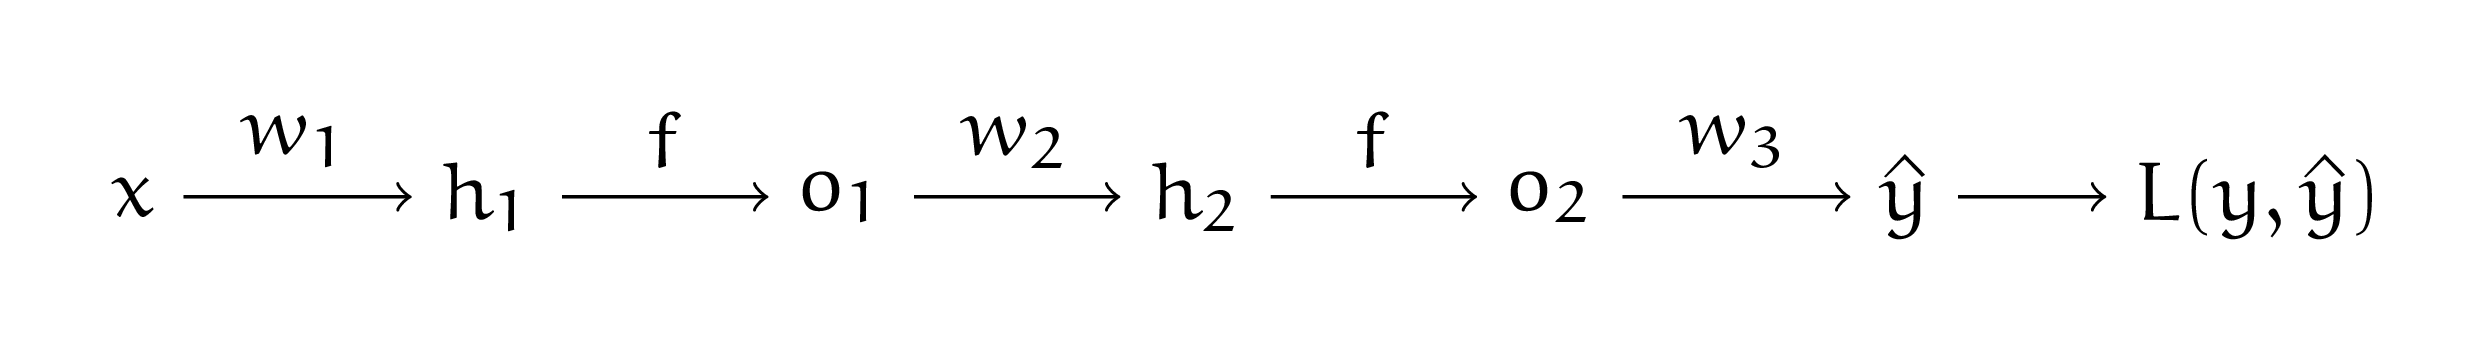


Наша нейросеть — граф вычислений. Давайте запишем для каждого ребра в рамках этого графа производную.

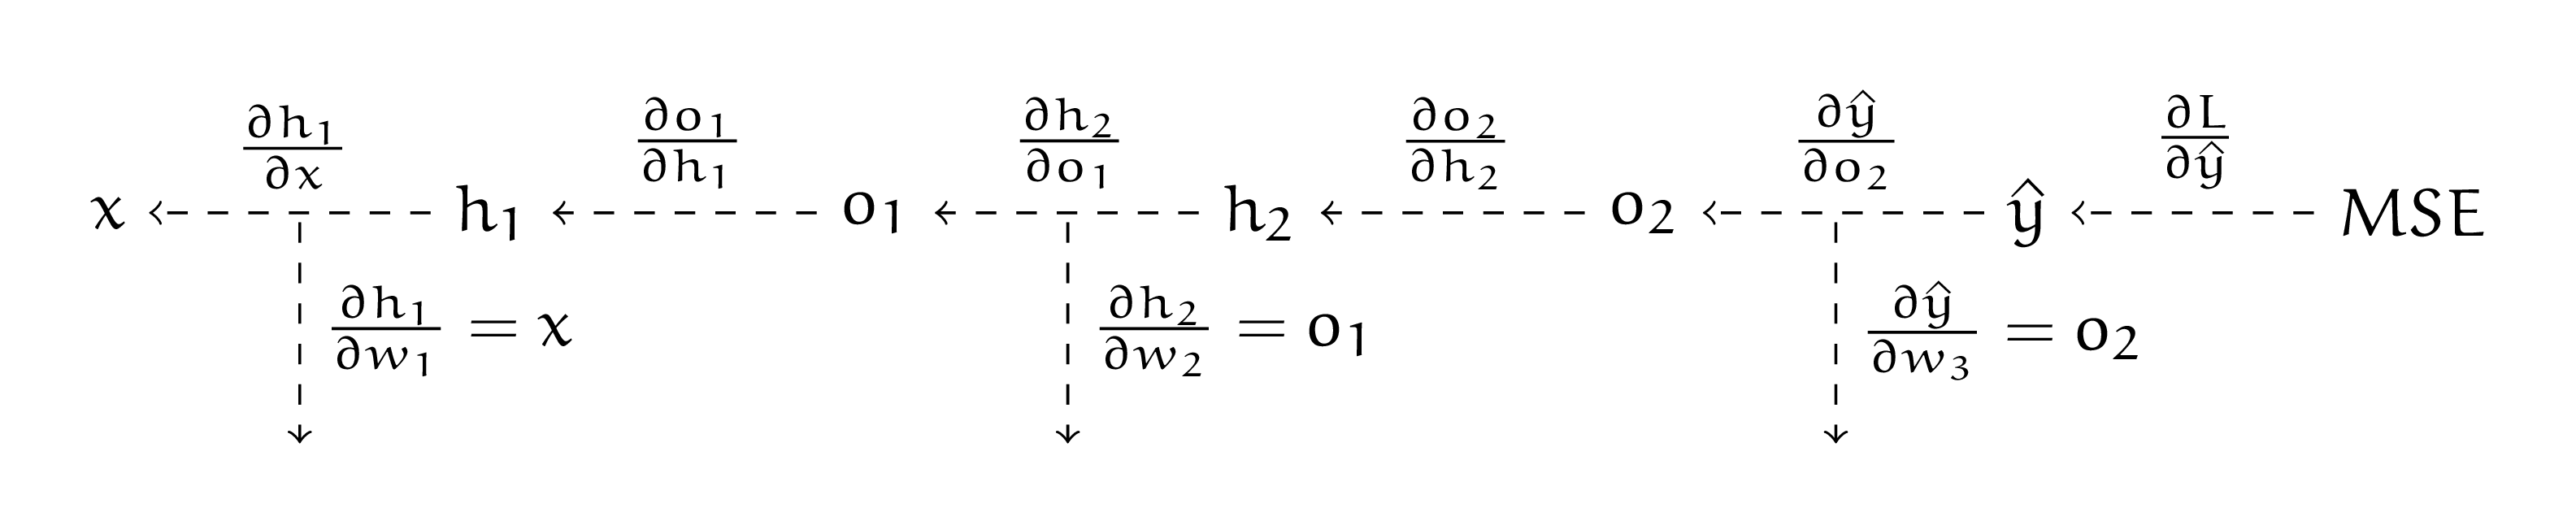




2. **Обратный проход**:
   - Начинаем с вычисления производной функции потерь по выходу сети:
  $$
     d = \frac{\partial L}{\partial \hat{y}} = (y - \hat{y}).
  $$


   - Затем последовательно вычисляем производные по весам, используя сохранённые промежуточные результаты:
  $$
     \begin{aligned}
     \frac{\partial L}{\partial w_3} &= d \cdot o_2, \\
     d &= d \cdot w_3 \cdot f'(h_2), \\
     \frac{\partial L}{\partial w_2} &= d \cdot o_1, \\
     d &= d \cdot w_2 \cdot f'(h_1), \\
     \frac{\partial L}{\partial w_1} &= d \cdot x.
     \end{aligned}
  $$

Если в качестве функции активации используется сигмоида:
$$
f(z) = \sigma(z) = \frac{1}{1 + e^{-z}},
$$
то её производная выражается как:
$$
\sigma'(z) = \sigma(z) \cdot (1 - \sigma(z)).
$$

Таким образом, для каждого слоя:
$$
\frac{\partial o_k}{\partial h_k} = \sigma(h_k) \cdot (1 - \sigma(h_k)) = o_k \cdot (1 - o_k).
$$

Таким образом, алгоритм обратного распространения ошибки позволяет эффективно вычислять градиенты для всех весов нейронной сети за время $O(m)$, где $m$ — глубина сети. Это достигается за счёт переиспользования промежуточных результатов, что значительно ускоряет процесс обучения по сравнению с прямым вычислением производных для каждого веса отдельно. В случае использования матриц и многомерных данных принцип остаётся тем же, но требует дополнительного внимания к размерностям и правилам матричного умножения.


## 3. Сигмоида как функция активации

В неглубоких нейронных сетях в качестве функции активации часто используется сигмоида, которая задаётся следующим выражением:

$$
\sigma(z) = \frac{1}{1 + e^{-z}} = \frac{e^z}{1 + e^z}.
$$

Сигмоида обладает рядом полезных свойств, таких как гладкость и ограниченность выходных значений в интервале $(0, 1)$, что делает её удобной для использования в задачах классификации. Однако, в отличие от некоторых других функций активации, сигмоида не имеет параметров, которые можно было бы обучать. Для обучения нейронной сети с использованием сигмоиды необходимо вычислить производную функции потерь $L$ по входу сигмоиды $z$, то есть $\frac{\partial L}{\partial z}$.

## Вычисление производной сигмоиды

Производная сигмоиды по её аргументу $z$ выражается следующим образом:

$$
\sigma'(z) = \sigma(z) \cdot (1 - \sigma(z)).
$$

Это свойство сигмоиды позволяет эффективно вычислять градиенты в процессе обратного распространения ошибки. Используя цепное правило, производную функции потерь $L$ по $z$ можно выразить через производные $\frac{\partial L}{\partial \sigma}$ и $\frac{\partial \sigma}{\partial z}$:

$$
\frac{\partial L}{\partial z} = \frac{\partial L}{\partial \sigma} \cdot \frac{\partial \sigma}{\partial z} = \frac{\partial L}{\partial \sigma} \cdot \sigma(z) \cdot (1 - \sigma(z)).
$$

## Применение сигмоиды к матрицам

В случае, если на вход сигмоиды подаётся матрица $Z$ размерности $[n \times k]$, сигмоида применяется к каждому элементу матрицы независимо. Таким образом, на выходе получается матрица $\Sigma$ той же размерности $[n \times k]$, где каждый элемент $\Sigma_{i,j} = \sigma(Z_{i,j})$.

При вычислении производной $\frac{\partial L}{\partial Z}$ для матричного случая также используется поэлементное умножение. Производная $\frac{\partial \Sigma}{\partial Z}$ представляет собой матрицу, каждый элемент которой равен $\sigma(Z_{i,j}) \cdot (1 - \sigma(Z_{i,j}))$. Таким образом, производная $\frac{\partial L}{\partial Z}$ вычисляется как поэлементное произведение матриц:

$$
\frac{\partial L}{\partial Z} = \frac{\partial L}{\partial \Sigma} \odot \left( \Sigma \odot (1 - \Sigma) \right),
$$

где $\odot$ обозначает произведение Адамара (поэлементное умножение матриц одного размера).

## Размерности и согласованность вычислений

При использовании цепного правила в матричном случае важно учитывать размерности. Производная $\frac{\partial L}{\partial \Sigma}$ представляет собой матрицу той же размерности, что и $\Sigma$, то есть $[n \times k]$. Умножение этой матрицы на $\Sigma \odot (1 - \Sigma)$ также выполняется поэлементно, что гарантирует сохранение размерности результата. Таким образом, итоговая матрица $\frac{\partial L}{\partial Z}$ имеет размерность $[n \times k]$, что соответствует размерности входной матрицы $Z$.


Таким образом, использование сигмоиды в качестве функции активации в нейронных сетях требует вычисления производной функции потерь по входу сигмоиды. Это достигается с помощью цепного правила и свойства производной сигмоиды $\sigma'(z) = \sigma(z) \cdot (1 - \sigma(z))$. В случае матричного входа все операции выполняются поэлементно, что обеспечивает согласованность размерностей и корректность вычислений. Данный подход позволяет эффективно применять алгоритм обратного распространения ошибки для обучения нейронных сетей с использованием сигмоиды.




## 4. Линейный слой в нейронных сетях

Линейный слой является одним из ключевых компонентов нейронных сетей. В матричном виде он может быть записан как:

$$
Z = XW,
$$

где:
- $X$ — входная матрица размерности $[n \times m]$,
- $W$ — матрица весов размерности $[m \times k]$,
- $Z$ — выходная матрица размерности $[n \times k]$.

Для обучения нейронной сети с использованием линейного слоя необходимо вычислить производные функции потерь $L$ по входной матрице $X$ и матрице весов $W$, то есть $\frac{\partial L}{\partial X}$ и $\frac{\partial L}{\partial W}$.

## Вычисление производных для линейного слоя

Предположим, что производная $\frac{\partial L}{\partial Z}$ уже вычислена в процессе обратного распространения ошибки. Для матрицы $Z$ размерности $[n \times k]$ производная $\frac{\partial L}{\partial Z}$ будет иметь ту же размерность:

$$
\frac{\partial L}{\partial Z} = \begin{pmatrix}
\frac{\partial L}{\partial z_{11}} & \frac{\partial L}{\partial z_{12}} & \frac{\partial L}{\partial z_{13}} \\
\frac{\partial L}{\partial z_{21}} & \frac{\partial L}{\partial z_{22}} & \frac{\partial L}{\partial z_{23}}
\end{pmatrix}.
$$

Используя цепное правило, производные $\frac{\partial L}{\partial X}$ и $\frac{\partial L}{\partial W}$ могут быть выражены через $\frac{\partial L}{\partial Z}$:

$$
\frac{\partial L}{\partial X} = \frac{\partial L}{\partial Z} \cdot \frac{\partial Z}{\partial X}, \quad \frac{\partial L}{\partial W} = \frac{\partial L}{\partial Z} \cdot \frac{\partial Z}{\partial W}.
$$

## Производная $\frac{\partial L}{\partial X}$

Для вычисления $\frac{\partial L}{\partial X}$ рассмотрим производную $\frac{\partial Z}{\partial X}$. Поскольку $Z = XW$, производная $\frac{\partial Z}{\partial X}$ представляет собой матрицу Якоби, которая в общем случае является четырёхмерной. Однако, благодаря структуре линейного слоя, многие элементы этой матрицы равны нулю, что позволяет упростить вычисления.

Для каждого элемента $x_{ij}$ матрицы $X$ производная $\frac{\partial L}{\partial x_{ij}}$ может быть вычислена как:

$$
\frac{\partial L}{\partial x_{ij}} = \sum_{p=1}^{n} \sum_{q=1}^{k} \frac{\partial L}{\partial z_{pq}} \cdot \frac{\partial z_{pq}}{\partial x_{ij}}.
$$

Это выражение можно переписать в виде скалярного произведения матриц:

$$
\frac{\partial L}{\partial x_{ij}} = \left\langle \frac{\partial L}{\partial Z}, \frac{\partial Z}{\partial x_{ij}} \right\rangle.
$$

Для конкретного элемента $x_{11}$:

$$
\frac{\partial Z}{\partial x_{11}} = \begin{pmatrix}
w_{11} & w_{12} & w_{13} \\
0 & 0 & 0
\end{pmatrix},
$$

и, следовательно:

$$
\frac{\partial L}{\partial x_{11}} = \frac{\partial L}{\partial z_{11}} \cdot w_{11} + \frac{\partial L}{\partial z_{12}} \cdot w_{12} + \frac{\partial L}{\partial z_{13}} \cdot w_{13}.
$$

Аналогично вычисляются остальные элементы $\frac{\partial L}{\partial X}$. В итоге, производная $\frac{\partial L}{\partial X}$ может быть записана в виде произведения матриц:

$$
\frac{\partial L}{\partial X} = \frac{\partial L}{\partial Z} \cdot W^T.
$$

## Производная $\frac{\partial L}{\partial W}$

Для вычисления $\frac{\partial L}{\partial W}$ рассмотрим производную $\frac{\partial Z}{\partial W}$. Аналогично предыдущему случаю, производная $\frac{\partial Z}{\partial W}$ является матрицей Якоби, но благодаря структуре линейного слоя, многие элементы равны нулю.

Для каждого элемента $w_{kl}$ матрицы $W$ производная $\frac{\partial L}{\partial w_{kl}}$ может быть вычислена как:

$$
\frac{\partial L}{\partial w_{kl}} = \sum_{i=1}^{n} \sum_{j=1}^{k} \frac{\partial L}{\partial z_{ij}} \cdot \frac{\partial z_{ij}}{\partial w_{kl}}.
$$

Это выражение также можно переписать в виде скалярного произведения матриц:

$$
\frac{\partial L}{\partial w_{kl}} = \left\langle \frac{\partial L}{\partial Z}, \frac{\partial Z}{\partial w_{kl}} \right\rangle.
$$

Для конкретного элемента $w_{21}$:

$$
\frac{\partial Z}{\partial w_{21}} = \begin{pmatrix}
x_{12} & 0 & 0 \\
x_{22} & 0 & 0
\end{pmatrix},
$$

и, следовательно:

$$
\frac{\partial L}{\partial w_{21}} = \frac{\partial L}{\partial z_{11}} \cdot x_{12} + \frac{\partial L}{\partial z_{21}} \cdot x_{22}.
$$

Аналогично вычисляются остальные элементы $\frac{\partial L}{\partial W}$. В итоге, производная $\frac{\partial L}{\partial W}$ может быть записана в виде произведения матриц:

$$
\frac{\partial L}{\partial W} = X^T \cdot \frac{\partial L}{\partial Z}.
$$

Таким образом, для линейного слоя $Z = XW$ производные функции потерь $L$ по входной матрице $X$ и матрице весов $W$ могут быть вычислены следующим образом:

$$
\frac{\partial L}{\partial X} = \frac{\partial L}{\partial Z} \cdot W^T, \quad \frac{\partial L}{\partial W} = X^T \cdot \frac{\partial L}{\partial Z}.
$$

Эти формулы позволяют эффективно вычислять градиенты в процессе обратного распространения ошибки, избегая необходимости работы с четырёхмерными матрицами Якоби. В дальнейшем под $\frac{\partial Z}{\partial W}$ будем подразумевать $X^T$, а под $\frac{\partial Z}{\partial X}$ — $W^T$.






## 5. Обратное распространение ошибки в матричном виде

Рассмотрим нейронную сеть, представленную на Рис. 6, где $w_{ij}^k$ — веса для $k$-го слоя, а $f(t)$ — некоторая функция активации.

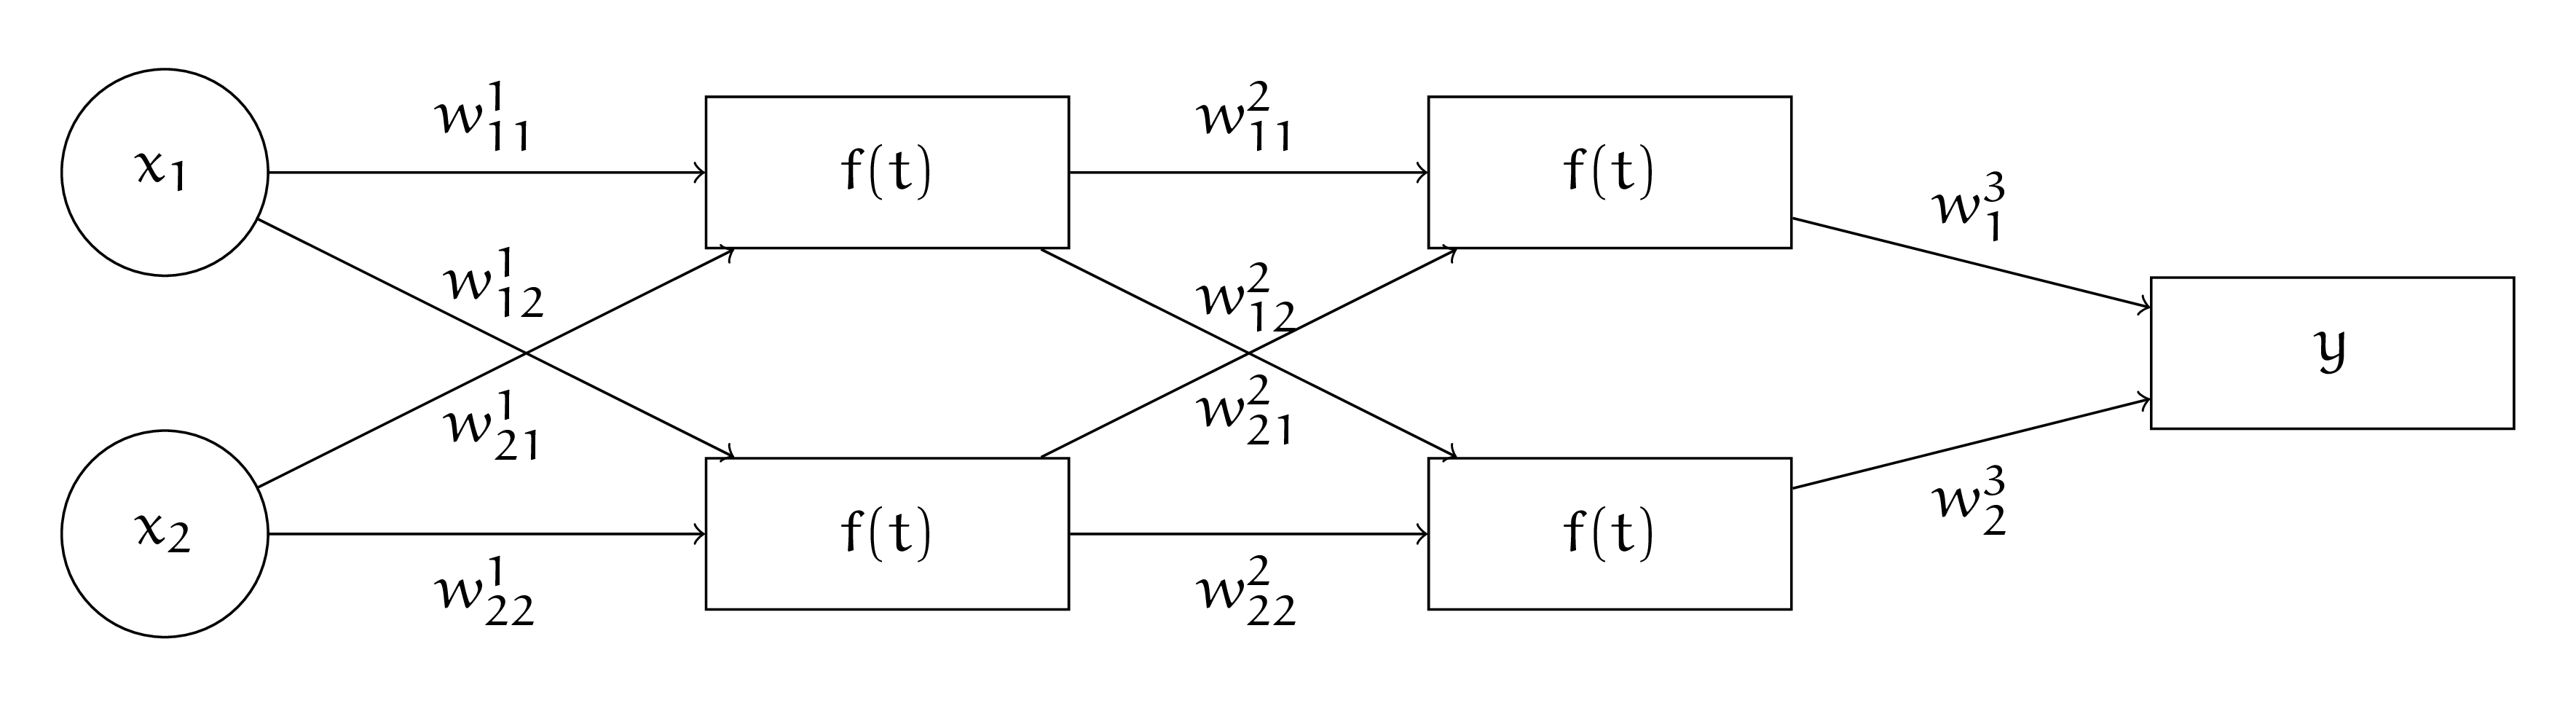

 Целью является обучение такой нейронной сети с использованием градиентного спуска. Для этого необходимо вывести алгоритм обратного распространения ошибки в матричном виде.

## а) Представление нейронной сети как сложной функции

Для начала запишем нейронную сеть в виде последовательности уравнений, а затем перейдём к матричной записи. Введём следующие обозначения:
- $h_{ij}^k$ — выход $k$-го слоя для $j$-го нейрона и $i$-го наблюдения до применения функции активации,
- $o_{ij}^k$ — выход $k$-го слоя для $j$-го нейрона и $i$-го наблюдения после применения функции активации.

Для первого слоя:
$$
h_{i1}^1 = w_{11}^1 \cdot x_{i1} + w_{21}^1 \cdot x_{i2}, \quad o_{i1}^1 = f(h_{i1}^1),
$$
$$
h_{i2}^1 = w_{12}^1 \cdot x_{i1} + w_{22}^1 \cdot x_{i2}, \quad o_{i2}^1 = f(h_{i2}^1).
$$

Для второго слоя:
$$
h_{i1}^2 = w_{11}^2 \cdot o_{i1}^1 + w_{21}^2 \cdot o_{i2}^1, \quad o_{i1}^2 = f(h_{i1}^2),
$$
$$
h_{i2}^2 = w_{12}^2 \cdot o_{i1}^1 + w_{22}^2 \cdot o_{i2}^1, \quad o_{i2}^2 = f(h_{i2}^2).
$$

На выходе сети предсказание $\hat{y}_i$ вычисляется как взвешенная сумма выходов второго слоя:
$$
\hat{y}_i = w_1^3 \cdot o_{i1}^2 + w_2^3 \cdot o_{i2}^2.
$$

Подставляя выражения для $o_{i1}^2$ и $o_{i2}^2$, получаем сложную функцию:
$$
\hat{y}_i = w_1^3 \cdot f\left(w_{11}^2 \cdot f(w_{11}^1 \cdot x_{i1} + w_{21}^1 \cdot x_{i2}) + w_{21}^2 \cdot f(w_{12}^1 \cdot x_{i1} + w_{22}^1 \cdot x_{i2})\right) +
$$
$$
+ w_2^3 \cdot f\left(w_{12}^2 \cdot f(w_{11}^1 \cdot x_{i1} + w_{21}^1 \cdot x_{i2}) + w_{22}^2 \cdot f(w_{12}^1 \cdot x_{i1} + w_{22}^1 \cdot x_{i2})\right).
$$

Такая запись является громоздкой, поэтому перейдём к матричному представлению.

## Матричное представление нейронной сети

Первый слой может быть записан в матричном виде как:
$$
H^1 = X \cdot W^1, \quad O^1 = f(H^1),
$$
где:
- $X$ — матрица входных данных размерности $[n \times 2]$,
- $W^1$ — матрица весов первого слоя размерности $[2 \times 2]$,
- $H^1$ и $O^1$ — матрицы выходов первого слоя до и после применения функции активации соответственно.

Аналогично, второй слой:
$$
H^2 = O^1 \cdot W^2, \quad O^2 = f(H^2),
$$
где $W^2$ — матрица весов второго слоя размерности $[2 \times 2]$.

На выходе сети:
$$
\hat{y} = O^2 \cdot W^3,
$$
где $W^3$ — матрица весов выходного слоя размерности $[2 \times 1]$.

Таким образом, нейронная сеть в матричном виде записывается как:
$$
\hat{y} = f\left(f(X \cdot W^1) \cdot W^2\right) \cdot W^3.
$$

## б) Алгоритм обратного распространения ошибки

Алгоритм обратного распространения ошибки состоит из двух этапов: прямого прохода (forward pass) и обратного прохода (backward pass).

### Прямой проход (Рис. 7)


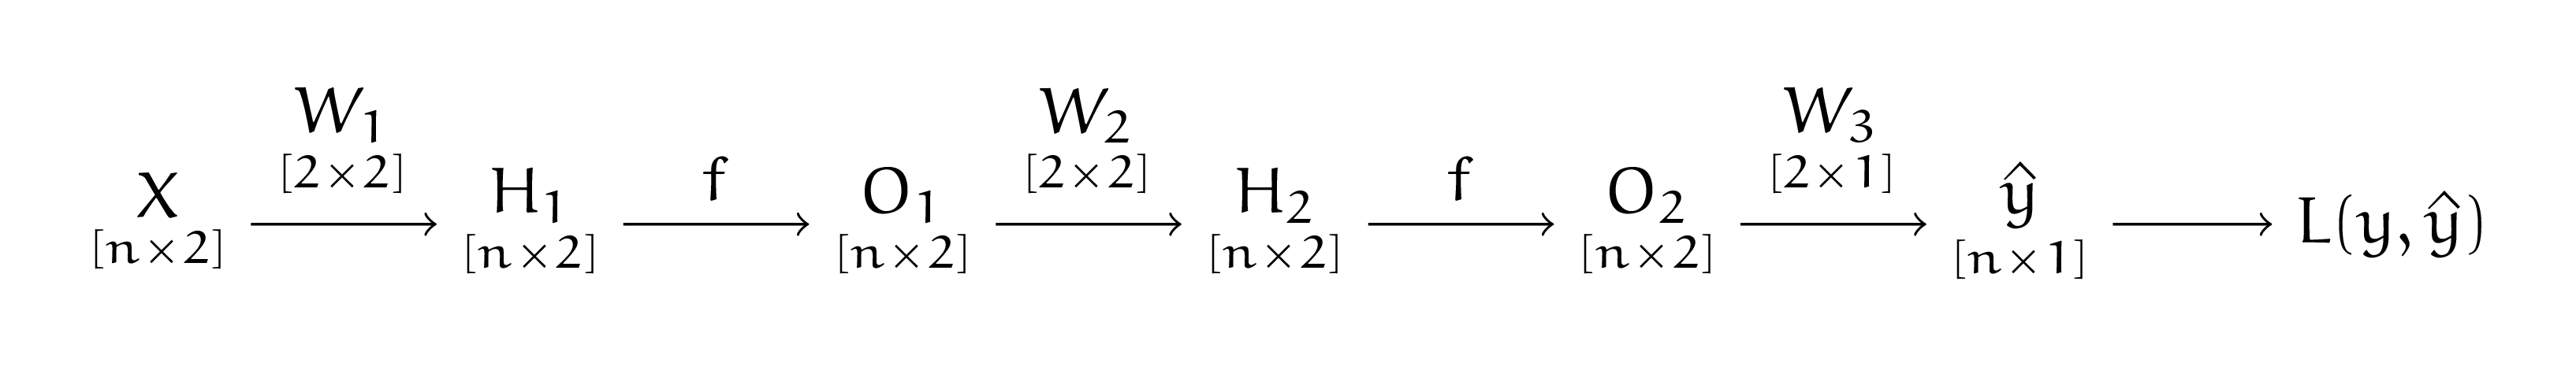


На этапе прямого прохода вычисляются все промежуточные значения:
$$
H^1 = X \cdot W^1, \quad O^1 = f(H^1),
$$
$$
H^2 = O^1 \cdot W^2, \quad O^2 = f(H^2),
$$
$$
\hat{y} = O^2 \cdot W^3.
$$

Все промежуточные результаты сохраняются для использования на этапе обратного прохода.

### Обратный проход

На этапе обратного прохода вычисляются производные функции потерь $L$ по всем параметрам сети. Введём переменную $d$ для накопления производных.

1. **Производная по $W^3$:**
$$
   d = \frac{\partial L}{\partial \hat{y}},
$$
$$
   \frac{\partial L}{\partial W^3} = (O^2)^T \cdot d.
$$

2. **Производная по $W^2$:**
$$
   d = d \cdot (W^3)^T \odot f'(H^2),
$$
$$
   \frac{\partial L}{\partial W^2} = (O^1)^T \cdot d.
$$

3. **Производная по $W^1$:**
$$
   d = d \cdot (W^2)^T \odot f'(H^1),
$$
$$
   \frac{\partial L}{\partial W^1} = X^T \cdot d.
$$

Здесь $\odot$ обозначает поэлементное умножение (произведение Адамара).

### Схема алгоритма (Рис. 8)


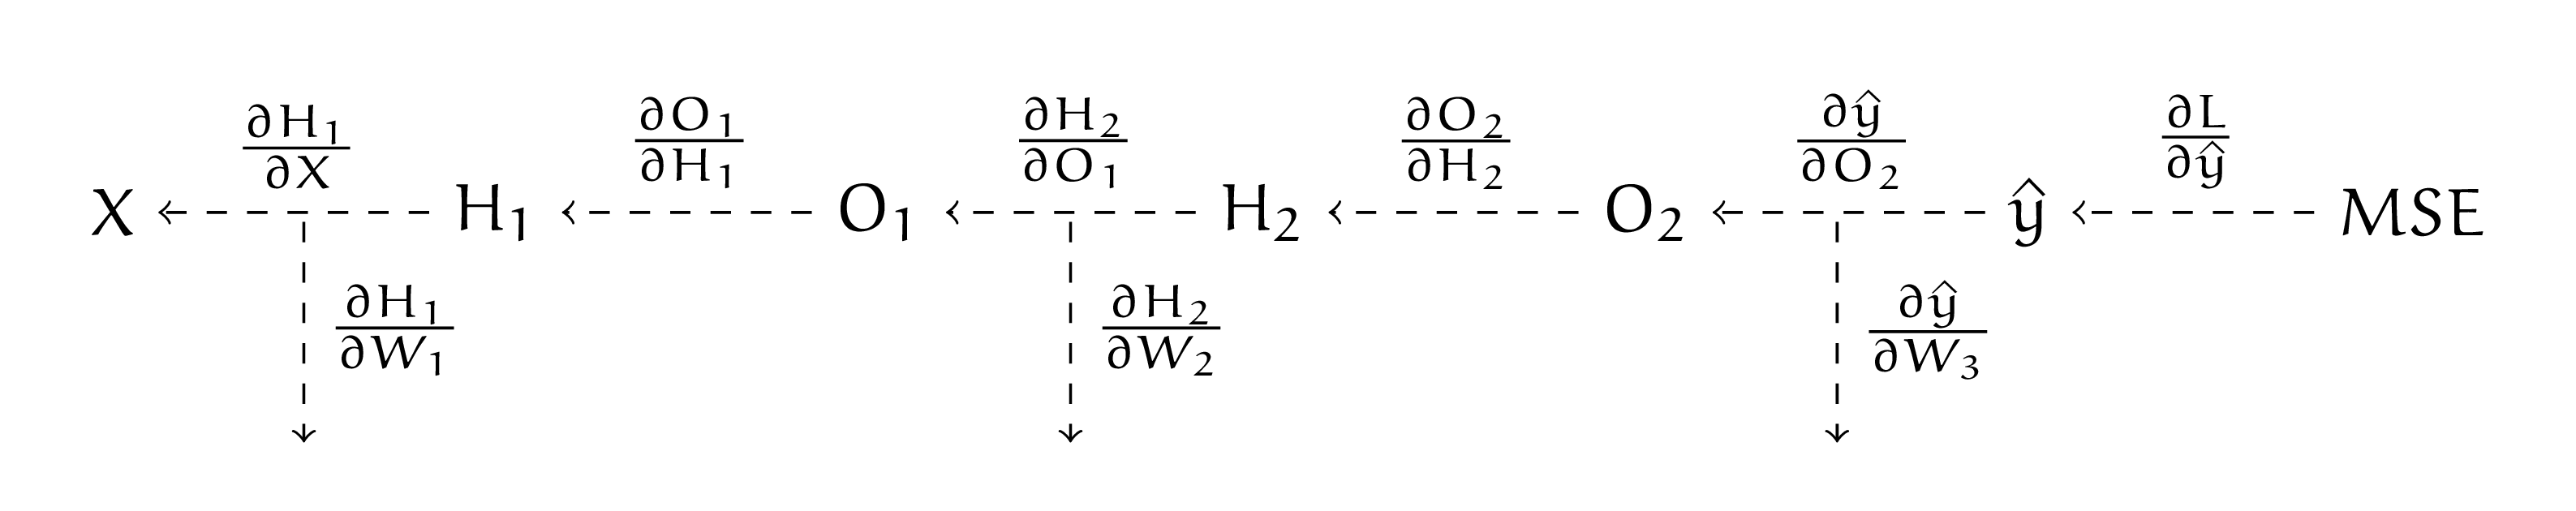


На Рис. 8 представлена схема графа вычислений с указанием размерностей матриц и производных. В ходе обратного прохода производные вычисляются последовательно, начиная с выходного слоя и заканчивая входным слоем. Это позволяет эффективно переиспользовать промежуточные результаты и избежать повторных вычислений.


Таким образом, алгоритм обратного распространения ошибки в матричном виде позволяет эффективно вычислять градиенты для всех параметров нейронной сети. Использование матричных операций и поэлементных умножений обеспечивает линейную сложность алгоритма по числу параметров, что делает его применимым для обучения глубоких нейронных сетей.



### 6. Обратное распространение ошибки вручную

Рассмотрим нейронную сеть, представленную на Рис. 9, с функцией потерь, заданной как среднеквадратичная ошибка (MSE):


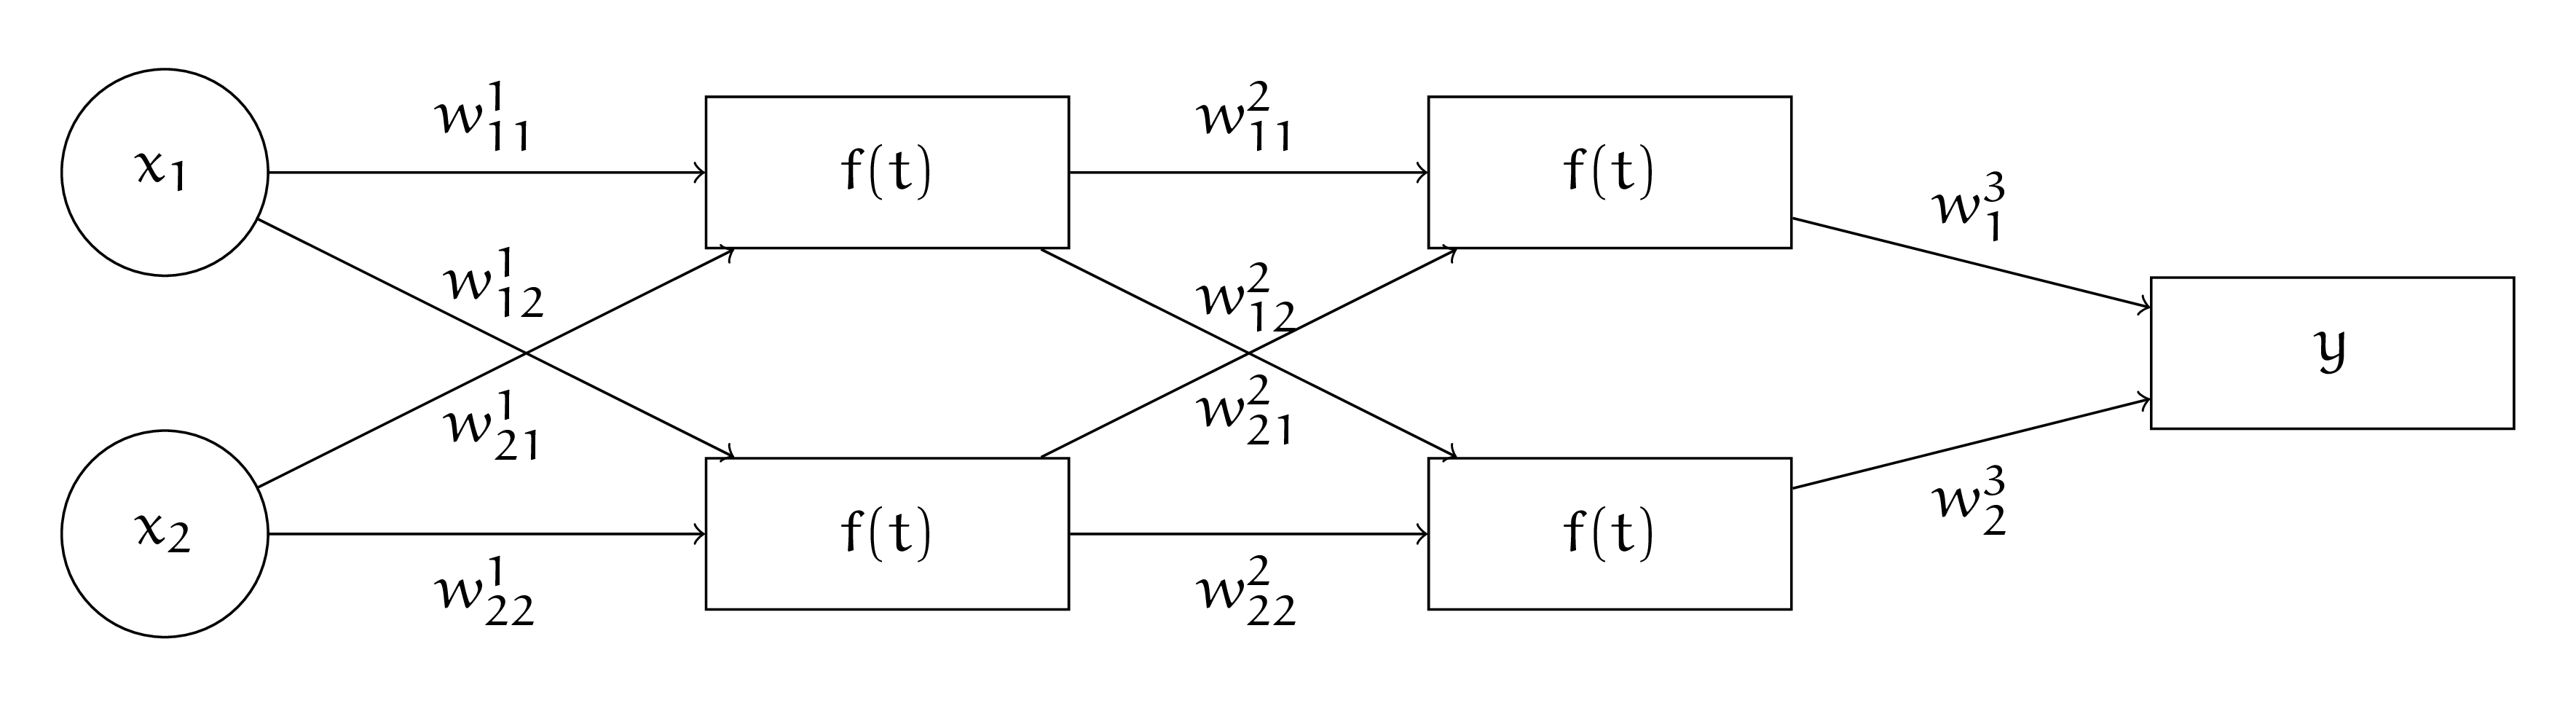


$$
L(W_1, W_2, W_3) = \frac{1}{2} \cdot (\hat{y} - y)^2.
$$

В качестве функции активации используется сигмоида:

$$
\sigma(t) = \frac{e^t}{1 + e^t}.
$$

## Алгоритм обратного распространения ошибки

Алгоритм обратного распространения ошибки состоит из двух этапов: прямого прохода (forward pass) и обратного прохода (backward pass). Рассмотрим их подробно.

### Прямой проход (Рис. 10)


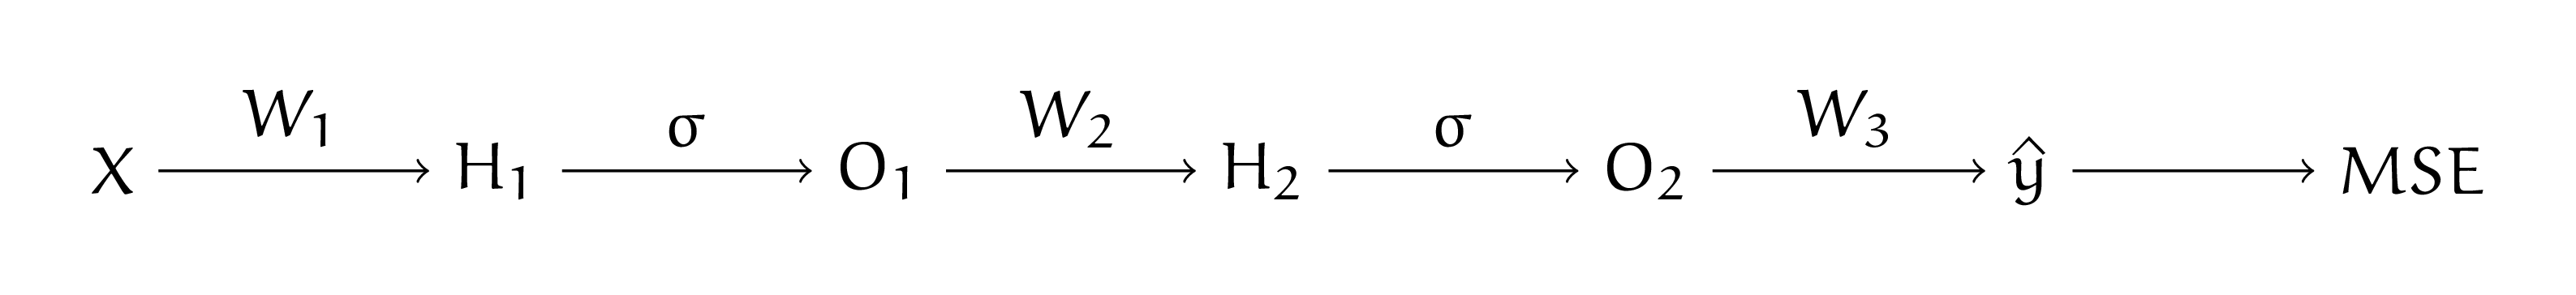


На этапе прямого прохода вычисляются выходы каждого слоя сети. Для сигмоиды производная выражается как:

$$
\sigma'(t) = \sigma(t) \cdot (1 - \sigma(t)).
$$

### Обратный проход (Рис. 3)


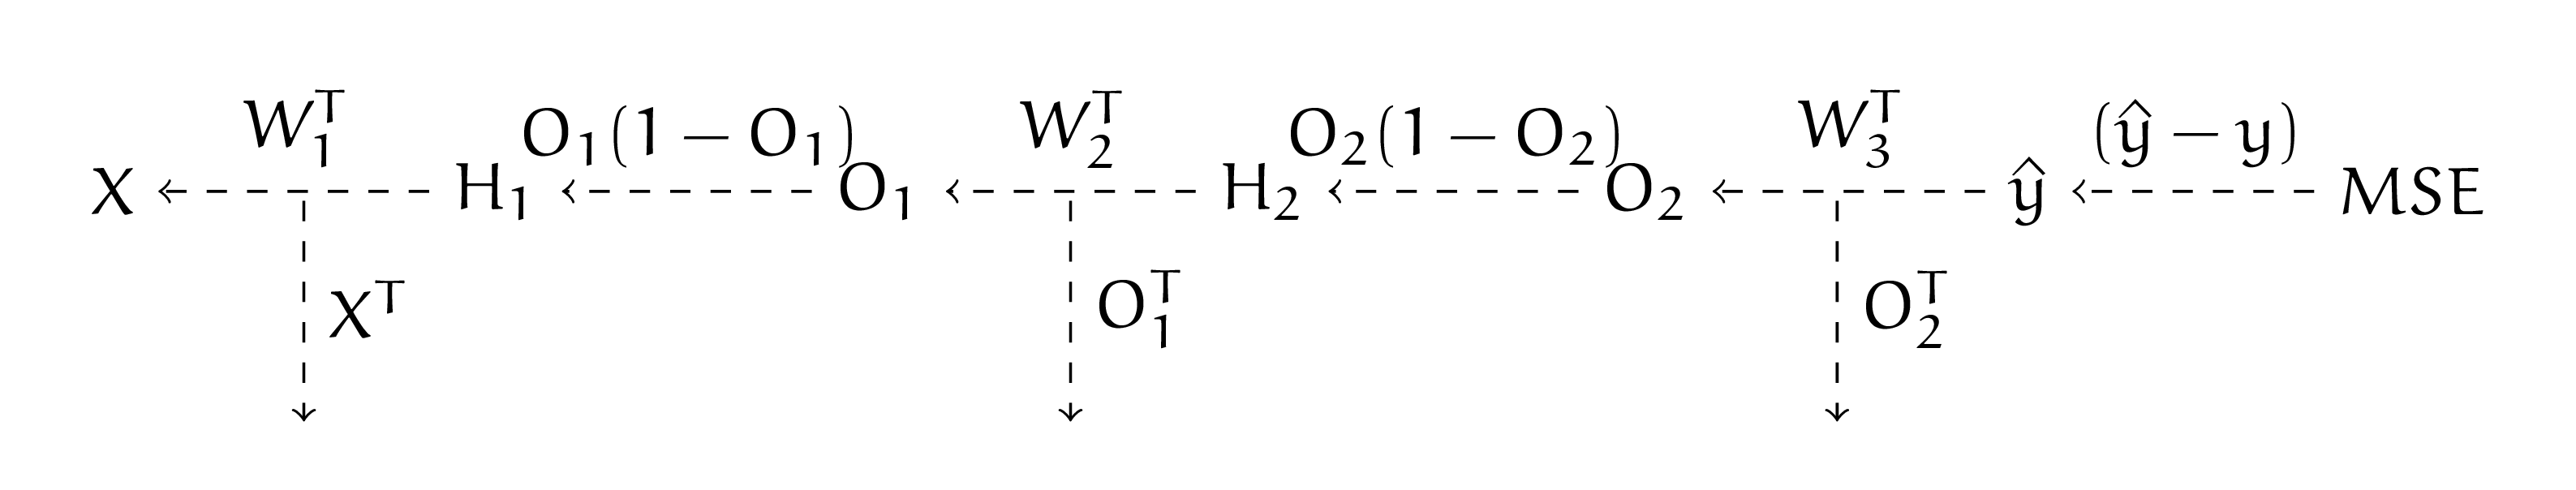


На этапе обратного прохода вычисляются градиенты функции потерь по всем параметрам сети. Введём переменную $d$ для накопления производных.

1. **Производная по $W_3$:**
$$
   d = (\hat{y} - y),
$$
$$
   \frac{\partial L}{\partial W_3} = O_2^T \cdot d.
$$

2. **Производная по $W_2$:**
$$
   d = d \cdot W_3^T \odot O_2 \odot (1 - O_2),
$$
$$
   \frac{\partial L}{\partial W_2} = O_1^T \cdot d.
$$

3. **Производная по $W_1$:**
$$
   d = d \cdot W_2^T \odot O_1 \odot (1 - O_1),
$$
$$
   \frac{\partial L}{\partial W_1} = X^T \cdot d.
$$

Здесь $\odot$ обозначает поэлементное умножение (произведение Адамара).

## Применение алгоритма к конкретным данным

Рассмотрим два наблюдения:
1. $x_1 = 1, x_2 = 1, y = 0$,
2. $x_1 = 5, x_2 = 2, y = 1$.

Инициализируем веса нулями: $W_1 = W_2 = W_3 = 0$. Скорость обучения $\eta = 1$. Стохастический градиентный спуск (SGD) использует сначала второе наблюдение, затем первое.

### Шаг SGD для второго наблюдения

**Прямой проход (Рис. 4):**
$$
O_1 = \sigma(X \cdot W_1) = \sigma\left(\begin{pmatrix} 5 & 2 \end{pmatrix} \cdot \begin{pmatrix} 0 & 0 \\ 0 & 0 \end{pmatrix}\right) = \sigma\left(\begin{pmatrix} 0 & 0 \end{pmatrix}\right) = \begin{pmatrix} 0.5 & 0.5 \end{pmatrix},
$$
$$
O_2 = \sigma(O_1 \cdot W_2) = \sigma\left(\begin{pmatrix} 0.5 & 0.5 \end{pmatrix} \cdot \begin{pmatrix} 0 & 0 \\ 0 & 0 \end{pmatrix}\right) = \sigma\left(\begin{pmatrix} 0 & 0 \end{pmatrix}\right) = \begin{pmatrix} 0.5 & 0.5 \end{pmatrix},
$$
$$
\hat{y} = O_2 \cdot W_3 = \begin{pmatrix} 0.5 & 0.5 \end{pmatrix} \cdot \begin{pmatrix} 0 \\ 0 \end{pmatrix} = 0.
$$

**Обратный проход:**
1. $d = (\hat{y} - y) = -1$,
$$
   \frac{\partial L}{\partial W_3} = O_2^T \cdot d = \begin{pmatrix} 0.5 \\ 0.5 \end{pmatrix} \cdot (-1) = \begin{pmatrix} -0.5 \\ -0.5 \end{pmatrix}.
$$

2. $d = d \cdot W_3^T \odot O_2 \odot (1 - O_2) = -1 \cdot \begin{pmatrix} 0 & 0 \end{pmatrix} \odot \begin{pmatrix} 0.5 & 0.5 \end{pmatrix} \odot \begin{pmatrix} 0.5 & 0.5 \end{pmatrix} = \begin{pmatrix} 0 & 0 \end{pmatrix}$,
$$
   \frac{\partial L}{\partial W_2} = O_1^T \cdot d = \begin{pmatrix} 0.5 \\ 0.5 \end{pmatrix} \cdot \begin{pmatrix} 0 & 0 \end{pmatrix} = \begin{pmatrix} 0 & 0 \\ 0 & 0 \end{pmatrix}.
$$

3. $d = d \cdot W_2^T \odot O_1 \odot (1 - O_1) = \begin{pmatrix} 0 & 0 \end{pmatrix} \cdot \begin{pmatrix} 0 & 0 \\ 0 & 0 \end{pmatrix} \odot \begin{pmatrix} 0.5 & 0.5 \end{pmatrix} \odot \begin{pmatrix} 0.5 & 0.5 \end{pmatrix} = \begin{pmatrix} 0 & 0 \end{pmatrix}$,
$$
   \frac{\partial L}{\partial W_1} = X^T \cdot d = \begin{pmatrix} 5 \\ 2 \end{pmatrix} \cdot \begin{pmatrix} 0 & 0 \end{pmatrix} = \begin{pmatrix} 0 & 0 \\ 0 & 0 \end{pmatrix}.
$$

**Обновление весов:**
$$
W_3^1 = W_3^0 - \eta \cdot \frac{\partial L}{\partial W_3} = \begin{pmatrix} 0 \\ 0 \end{pmatrix} - 1 \cdot \begin{pmatrix} -0.5 \\ -0.5 \end{pmatrix} = \begin{pmatrix} 0.5 \\ 0.5 \end{pmatrix},
$$
$$
W_2^1 = W_2^0 - \eta \cdot \frac{\partial L}{\partial W_2} = \begin{pmatrix} 0 & 0 \\ 0 & 0 \end{pmatrix} - 1 \cdot \begin{pmatrix} 0 & 0 \\ 0 & 0 \end{pmatrix} = \begin{pmatrix} 0 & 0 \\ 0 & 0 \end{pmatrix},
$$
$$
W_1^1 = W_1^0 - \eta \cdot \frac{\partial L}{\partial W_1} = \begin{pmatrix} 0 & 0 \\ 0 & 0 \end{pmatrix} - 1 \cdot \begin{pmatrix} 0 & 0 \\ 0 & 0 \end{pmatrix} = \begin{pmatrix} 0 & 0 \\ 0 & 0 \end{pmatrix}.
$$

### Шаг SGD для первого наблюдения

**Прямой проход (Рис. 5):**
$$
O_1 = \sigma(X \cdot W_1) = \sigma\left(\begin{pmatrix} 1 & 1 \end{pmatrix} \cdot \begin{pmatrix} 0 & 0 \\ 0 & 0 \end{pmatrix}\right) = \sigma\left(\begin{pmatrix} 0 & 0 \end{pmatrix}\right) = \begin{pmatrix} 0.5 & 0.5 \end{pmatrix},
$$
$$
O_2 = \sigma(O_1 \cdot W_2) = \sigma\left(\begin{pmatrix} 0.5 & 0.5 \end{pmatrix} \cdot \begin{pmatrix} 0 & 0 \\ 0 & 0 \end{pmatrix}\right) = \sigma\left(\begin{pmatrix} 0 & 0 \end{pmatrix}\right) = \begin{pmatrix} 0.5 & 0.5 \end{pmatrix},
$$
$$
\hat{y} = O_2 \cdot W_3 = \begin{pmatrix} 0.5 & 0.5 \end{pmatrix} \cdot \begin{pmatrix} 0.5 \\ 0.5 \end{pmatrix} = 0.5.
$$

**Обратный проход:**
1. $d = (\hat{y} - y) = 0.5$,
$$
   \frac{\partial L}{\partial W_3} = O_2^T \cdot d = \begin{pmatrix} 0.5 \\ 0.5 \end{pmatrix} \cdot 0.5 = \begin{pmatrix} 0.25 \\ 0.25 \end{pmatrix}.
$$

2. $d = d \cdot W_3^T \odot O_2 \odot (1 - O_2) = 0.5 \cdot \begin{pmatrix} 0.5 & 0.5 \end{pmatrix} \odot \begin{pmatrix} 0.5 & 0.5 \end{pmatrix} \odot \begin{pmatrix} 0.5 & 0.5 \end{pmatrix} = \begin{pmatrix} \frac{1}{16} & \frac{1}{16} \end{pmatrix}$,
$$
   \frac{\partial L}{\partial W_2} = O_1^T \cdot d = \begin{pmatrix} 0.5 \\ 0.5 \end{pmatrix} \cdot \begin{pmatrix} \frac{1}{16} & \frac{1}{16} \end{pmatrix} = \begin{pmatrix} \frac{1}{32} & \frac{1}{32} \\ \frac{1}{32} & \frac{1}{32} \end{pmatrix}.
$$

3. $d = d \cdot W_2^T \odot O_1 \odot (1 - O_1) = \begin{pmatrix} \frac{1}{16} & \frac{1}{16} \end{pmatrix} \cdot \begin{pmatrix} 0 & 0 \\ 0 & 0 \end{pmatrix} \odot \begin{pmatrix} 0.5 & 0.5 \end{pmatrix} \odot \begin{pmatrix} 0.5 & 0.5 \end{pmatrix} = \begin{pmatrix} 0 & 0 \end{pmatrix}$,
$$
   \frac{\partial L}{\partial W_1} = X^T \cdot d = \begin{pmatrix} 1 \\ 1 \end{pmatrix} \cdot \begin{pmatrix} 0 & 0 \end{pmatrix} = \begin{pmatrix} 0 & 0 \\ 0 & 0 \end{pmatrix}.
$$

**Обновление весов:**
$$
W_3^2 = W_3^1 - \eta \cdot \frac{\partial L}{\partial W_3} = \begin{pmatrix} 0.5 \\ 0.5 \end{pmatrix} - 1 \cdot \begin{pmatrix} 0.25 \\ 0.25 \end{pmatrix} = \begin{pmatrix} 0.25 \\ 0.25 \end{pmatrix},
$$
$$
W_2^2 = W_2^1 - \eta \cdot \frac{\partial L}{\partial W_2} = \begin{pmatrix} 0 & 0 \\ 0 & 0 \end{pmatrix} - 1 \cdot \begin{pmatrix} \frac{1}{32} & \frac{1}{32} \\ \frac{1}{32} & \frac{1}{32} \end{pmatrix} = \begin{pmatrix} -\frac{1}{32} & -\frac{1}{32} \\ -\frac{1}{32} & -\frac{1}{32} \end{pmatrix},
$$
$$
W_1^2 = W_1^1 - \eta \cdot \frac{\partial L}{\partial W_1} = \begin{pmatrix} 0 & 0 \\ 0 & 0 \end{pmatrix} - 1 \cdot \begin{pmatrix} 0 & 0 \\ 0 & 0 \end{pmatrix} = \begin{pmatrix} 0 & 0 \\ 0 & 0 \end{pmatrix}.
$$

## Проблема инициализации весов нулями

Инициализация весов нулями приводит к тому, что все нейроны в сети начинают обучаться одинаково, так как градиенты для всех весов на начальном этапе одинаковы. Это замедляет обучение и делает его менее эффективным. Даже если инициализировать веса другой константой, проблема сохранится, так как все веса будут изменяться синхронно.

Для решения этой проблемы рекомендуется использовать случайную инициализацию весов, которая позволяет нейронам обучаться независимо и способствует разнообразию в сети. В дальнейшем будут рассмотрены более продвинутые методы инициализации, которые улучшают сходимость и стабильность обучения.


## 7. Обратное распространение ошибки в нейронной сети

Рассмотрим нейронную сеть, состоящую из трёх слоёв:
1. Линейный слой с весами $W_1$.
2. Слой с функцией активации ReLU.
3. Линейный слой с весами $W_2$.

## а) Прямой проход через первый слой (линейный)

Прямой проход через линейный слой выполняется по формуле:
$$
H_1 = X \cdot W_1,
$$
где $X$ — входная матрица, $W_1$ — матрица весов первого слоя.

Для входной матрицы:
$$
X = \begin{pmatrix} 1 & 2 \\ -1 & 2 \end{pmatrix},
$$
и весов:
$$
W_1 = \begin{pmatrix} 1 & -1 \\ 0.5 & 0 \end{pmatrix},
$$
прямой проход даёт:
$$
H_1 = X \cdot W_1 = \begin{pmatrix} 1 & 2 \\ -1 & 2 \end{pmatrix} \cdot \begin{pmatrix} 1 & -1 \\ 0.5 & 0 \end{pmatrix} = \begin{pmatrix} 2 & -1 \\ 0 & 1 \end{pmatrix}.
$$

## б) Обратный проход через первый слой

Производная выхода по входу для линейного слоя:
$$
\frac{\partial H_1}{\partial X} = W_1^T.
$$

При обратном проходе накопленный градиент $d = \begin{pmatrix} -0.5 & 0 \\ 0 & 0 \end{pmatrix}$ преобразуется следующим образом:
$$
d_{\text{новое}} = d \cdot W_1^T = \begin{pmatrix} -0.5 & 0 \\ 0 & 0 \end{pmatrix} \cdot \begin{pmatrix} 1 & 0.5 \\ -1 & 0 \end{pmatrix} = \begin{pmatrix} -0.5 & -0.25 \\ 0 & 0 \end{pmatrix}.
$$

## в) Прямой проход через второй слой (ReLU)

Прямой проход через слой с функцией активации ReLU выполняется по формуле:
$$
O_1 = \text{ReLU}(H_1) = \max(0, H_1).
$$

Для матрицы $H_1 = \begin{pmatrix} 2 & -1 \\ 0 & 1 \end{pmatrix}$:
$$
O_1 = \begin{pmatrix} \max(0, 2) & \max(0, -1) \\ \max(0, 0) & \max(0, 1) \end{pmatrix} = \begin{pmatrix} 2 & 0 \\ 0 & 1 \end{pmatrix}.
$$

## г) Обратный проход через второй слой (ReLU)

Производная выхода по входу для ReLU:
$$
\frac{\partial O_1}{\partial H_1} = [H_{ij} > 0],
$$
где $[H_{ij} > 0]$ — индикаторная функция, равная 1, если элемент $H_{ij} > 0$, и 0 иначе.

При обратном проходе накопленный градиент $d = \begin{pmatrix} -0.5 & -1 \\ 0 & 0 \end{pmatrix}$ преобразуется следующим образом:
$$
d_{\text{новое}} = d \odot [H_{ij} > 0] = \begin{pmatrix} -0.5 & -1 \\ 0 & 0 \end{pmatrix} \odot \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix} = \begin{pmatrix} -0.5 & 0 \\ 0 & 0 \end{pmatrix}.
$$

## д) Прямой проход через третий слой (линейный)

Прямой проход через линейный слой выполняется по формуле:
$$
\hat{y} = O_1 \cdot W_2,
$$
где $W_2$ — матрица весов второго слоя.

Для матрицы $O_1 = \begin{pmatrix} 2 & 0 \\ 0 & 1 \end{pmatrix}$ и весов:
$$
W_2 = \begin{pmatrix} 0.5 \\ 1 \end{pmatrix},
$$
прямой проход даёт:
$$
\hat{y} = O_1 \cdot W_2 = \begin{pmatrix} 2 & 0 \\ 0 & 1 \end{pmatrix} \cdot \begin{pmatrix} 0.5 \\ 1 \end{pmatrix} = \begin{pmatrix} 1 \\ 1 \end{pmatrix}.
$$

## е) Обратный проход через третий слой

Производная выхода по входу для линейного слоя:
$$
\frac{\partial \hat{y}}{\partial O_1} = W_2^T.
$$

При обратном проходе накопленный градиент $d = \begin{pmatrix} -1 \\ 0 \end{pmatrix}$ преобразуется следующим образом:
$$
d_{\text{новое}} = d \cdot W_2^T = \begin{pmatrix} -1 \\ 0 \end{pmatrix} \cdot \begin{pmatrix} 0.5 & 1 \end{pmatrix} = \begin{pmatrix} -0.5 & -1 \\ 0 & 0 \end{pmatrix}.
$$

## ё) Значение функции потерь MSE

Для реальных значений $y_1 = 2$, $y_2 = 1$ и прогнозов $\hat{y}_1 = 1$, $\hat{y}_2 = 1$, значение MSE:
$$
\text{MSE} = \frac{1}{2n} \sum (\hat{y}_i - y_i)^2 = \frac{1}{4} \left( (1 - 2)^2 + (1 - 1)^2 \right) = 0.25.
$$

## ж) Производная MSE по прогнозу

Производная MSE по прогнозу:
$$
\frac{\partial \text{MSE}}{\partial \hat{y}} = \begin{pmatrix} \hat{y}_1 - y_1 \\ \hat{y}_2 - y_2 \end{pmatrix} = \begin{pmatrix} -1 \\ 0 \end{pmatrix}.
$$

## з) Шаг градиентного спуска

При скорости обучения $\gamma = 1$, обновление весов:
$$
W_1 = W_1 - \gamma \cdot \frac{\partial \text{MSE}}{\partial W_1} = \begin{pmatrix} 1 & -1 \\ 0.5 & 0 \end{pmatrix} - 1 \cdot \begin{pmatrix} -0.5 & 0 \\ -1 & 0 \end{pmatrix} = \begin{pmatrix} 1.5 & -1 \\ 1.5 & 0 \end{pmatrix},
$$
$$
W_2 = W_2 - \gamma \cdot \frac{\partial \text{MSE}}{\partial W_2} = \begin{pmatrix} 0.5 \\ 1 \end{pmatrix} - 1 \cdot \begin{pmatrix} -2 \\ 0 \end{pmatrix} = \begin{pmatrix} 2.5 \\ 1 \end{pmatrix}.
$$

## и) Прямой проход с сигмоидой

Если задача классификации, то к выходу добавляется сигмоида:
$$
O_2 = \sigma(\hat{y}) = \frac{1}{1 + e^{-\hat{y}}}.
$$

## к) Прямой проход с logloss

Функция потерь logloss:
$$
\text{logloss} = y_i \cdot \ln(\hat{p}_i) + (1 - y_i) \cdot \ln(1 - \hat{p}_i),
$$
где $\hat{p}_i = \sigma(\hat{y}_i)$.

## л) Обратный проход с logloss

Производная logloss по прогнозу:
$$
\frac{\partial \text{logloss}}{\partial \hat{p}_i} = \frac{y_i}{\hat{p}_i} - \frac{1 - y_i}{1 - \hat{p}_i}.
$$

Для $y_1 = 0$, $y_2 = 1$:
$$
\frac{\partial \text{logloss}}{\partial \hat{p}_1} = -\frac{1}{1 - \hat{p}_1}, \quad \frac{\partial \text{logloss}}{\partial \hat{p}_2} = \frac{1}{\hat{p}_2}.
$$

Обратный проход через сигмоиду:
$$
\frac{\partial O_2}{\partial \hat{y}} = O_2 \cdot (1 - O_2).
$$

Накопленный градиент:
$$
d = \frac{\partial \text{logloss}}{\partial \hat{y}} = \frac{\partial \text{logloss}}{\partial \hat{p}} \odot \frac{\partial \hat{p}}{\partial \hat{y}}.
$$

Остальная часть алгоритма обратного распространения ошибки остаётся без изменений.









## 8. Сравнение стратегий обновления весов в алгоритме обратного распространения ошибки

В алгоритме обратного распространения ошибки (backpropagation) существует несколько подходов к обновлению весов нейронной сети. Рассмотрим два основных способа:

1. **Синхронное обновление весов**:
   - Все градиенты вычисляются на основе текущих значений весов $W^{t-1}$.
   - После вычисления всех градиентов одновременно обновляются все веса:
  $$
     W^t = W^{t-1} - \eta \cdot \nabla L(W^{t-1}),
  $$
     где $\eta$ — скорость обучения, а $\nabla L(W^{t-1})$ — градиент функции потерь по всем весам.

2. **Асинхронное (послойное) обновление весов**:
   - Градиенты вычисляются и веса обновляются последовательно, слой за слоем.
   - Сначала обновляются веса последнего слоя на основе градиентов, вычисленных с использованием $W^{t-1}$:
  $$
     W_k^t = W_k^{t-1} - \eta \cdot \nabla_k L(W^{t-1}),
  $$
     где $\nabla_k L(W^{t-1})$ — градиент по весам $k$-го слоя.
   - Затем, для вычисления градиентов предпоследнего слоя, используются уже обновлённые веса последнего слоя $W_k^t$, а не $W_k^{t-1}$.
   - Этот процесс повторяется для всех слоёв, начиная с последнего и заканчивая первым.

## Сравнение подходов

1. **Скорость сходимости**:
   - Асинхронное обновление весов может привести к более быстрой сходимости, так как каждый слой обновляется с учётом уже обновлённых весов последующих слоёв. Это позволяет учитывать изменения в сети на каждом шаге, что может ускорить процесс обучения.
   - Синхронное обновление, напротив, использует "устаревшие" значения весов для вычисления градиентов всех слоёв, что может замедлить сходимость.

2. **Вычислительная сложность**:
   - Синхронное обновление требует однократного вычисления всех градиентов, что может быть более эффективным с точки зрения вычислений, особенно при использовании параллельных вычислений.
   - Асинхронное обновление требует последовательного вычисления градиентов и обновления весов, что может увеличить время выполнения, особенно для глубоких сетей.

3. **Устойчивость к затуханию градиентов**:
   - Асинхронное обновление может быть более устойчивым к проблеме затухания градиентов, так как каждый слой обновляется с учётом текущих значений весов последующих слоёв, что может помочь сохранить градиенты на более ранних слоях.
   - Синхронное обновление может усугубить проблему затухания градиентов, особенно в глубоких сетях, где градиенты на ранних слоях могут становиться очень малыми.

Таким образом:

Асинхронное (послойное) обновление весов может привести к более быстрой сходимости, так как оно позволяет учитывать изменения в сети на каждом шаге. Однако этот подход может быть менее эффективным с точки зрения вычислительной сложности, особенно для глубоких сетей. Синхронное обновление, напротив, может быть более эффективным для параллельных вычислений, но может замедлить сходимость и усугубить проблему затухания градиентов.

Выбор между этими подходами зависит от конкретной задачи, архитектуры сети и доступных вычислительных ресурсов. В некоторых случаях может быть полезно комбинировать оба подхода, например, используя асинхронное обновление на начальных этапах обучения для ускорения сходимости, а затем переходя к синхронному обновлению для повышения эффективности вычислений.

